Q1
The simple linear regression model is a model used to "predict" an outcome based on a given estimator. It functions similarl to a graph of a straight line which, when given a single input, returns a single output. However, instead of a single input, linear regression models return a distribution of outputs. The variability/uncertainty of our outcome is represented by an error term added to the value of our outcome. The model is defined by the equation: 

$$ 
\Large
\begin{align}
Y_i = {}& \beta_0 + \beta_1 x_i + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma^2\right)\\
Y_i \sim {}& \mathcal N\left( \beta_0 + \beta_1 x_i, \sigma^2\right)
\end{align}
$$

Where:

$Y_i$ is the outcome we are trying to predict,

$x_i$ is the estimator that we use to predict the outcome,

$\beta_0$ is the y-intercept of the line of best fit of our data,

$\beta_1$ is the gradient of the line of best fit of our data,

$\epsilon_i$ is the error term.

The true value of $Y_i$ is distributed in a normal distribution with a mean of $\beta_0$ + $\beta_1$$x_i$. This means that the mean of the distribution is $\beta_0$ + $\beta_1$$x_i$ which is what $Y_i$ is most likely to be.

The error term represents the noise of the model, which captures the uncertainty and variability in our value of $Y_i$.

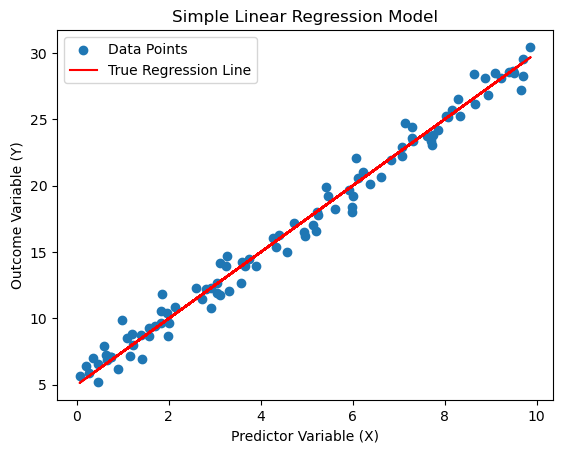

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate random predictor variable (X)
X = np.random.rand(100) * 10  # 100 random values between 0 and 10

# Define true slope and intercept coefficients
true_slope = 2.5
true_intercept = 5

# Gbenerate error term (ε) from normal distribution with mean 0 and standard deviation 1
error_term = norm.rvs(loc=0, scale=1, size=100)

# Calculate outcome variable (Y) using the Simple Linear Regression equation
Y = true_intercept + true_slope * X + error_term

# Plot the generated data points
plt.scatter(X, Y, label='Data Points')
plt.plot(X, true_intercept + true_slope * X, color='red', label='True Regression Line')
plt.xlabel('Predictor Variable (X)')
plt.ylabel('Outcome Variable (Y)')
plt.title('Simple Linear Regression Model')
plt.legend()
plt.show()


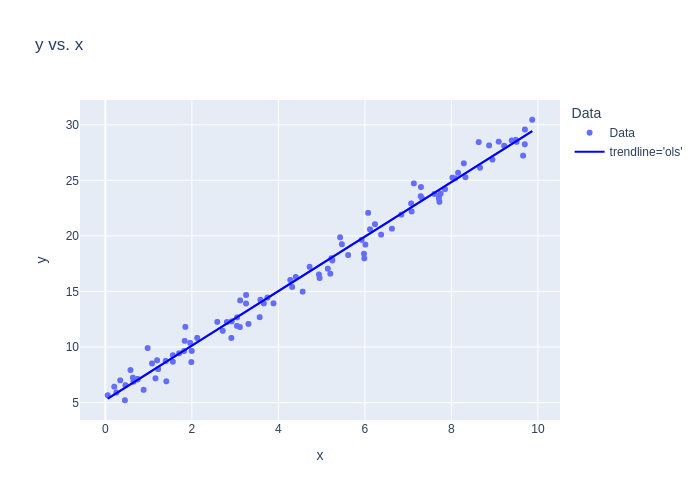

In [58]:
#Q2

import statsmodels.formula.api as smf  # what is this library for? used to fit statistic models using their formulas
import plotly.express as px  # this is a plotting library
import matplotlib.pyplot as plt
import pandas as pd

# Creating DataFrame df with columns 'x' and 'y' (values generated from code above)
df = pd.DataFrame({'x': X, 'y': Y})

# what are the following two steps doing? this code is fitting a linear regression model (with dependent 
#variable "y" and independent variable "x")

model_data_specification = smf.ols("y~x", data=df) 
fitted_model = model_data_specification.fit() 

# what do each of the following provide?
fitted_model.summary()  # simple explanation? provides a summary of the generated model (such as the values of the 
#intercept and gradient, and the uncertainty in these values)
fitted_model.summary().tables[1]  # simple explanation? shows the second row of the summary
#table that includes the values of the gradient and intercept of the model.
fitted_model.params  # simple explanation? returns the estimated values of the model parameters 
#(gradient and y-intercept)
fitted_model.params.values  # simple explanation? returns the same values as fitted_model.params except as an np.array
fitted_model.rsquared  # simple explanation? returns a value of R^2 which is a measure of how fitted our values are around
#the model.

# what two things does this add onto the figure? adds a new column with value "Data" for all rows to ensure 
#all datapoints are labelled "Data" on the figure. 
#also adds a trendline to the scatter plot.
df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='y vs. x')

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer = "png")

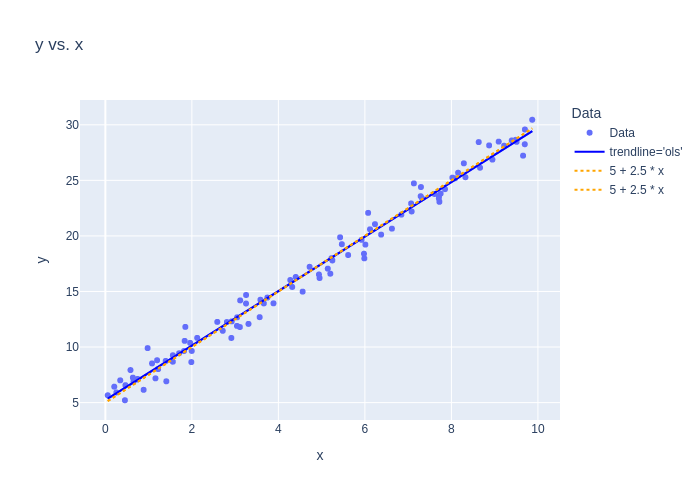

In [60]:
#Q3
# what does this add onto the figure in constrast to `trendline='ols'`? creates a np.array that contains the minimum
#and maximum values of the 'X' column which are used to plot all the points using the theoretical model we created.
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = true_intercept + true_slope * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(true_intercept)+' + '+str(true_slope)+' * x', 
                line=dict(dash='dot', color='orange'))
fig.show(renderer = "png")

The difference between the two lines is that the theoretical model that we created represents the true relationship between the variables x and y. It uses the true values of the parameters that we chose (in this case, the slope was 2.5 and the intercept was 5), with the error term being a value sampled from a normal distribution with mean 0 and standard deviation 1. Using this theoretical model, we simulated points by choosing 100 random predictors arbitrarily and then generated the outcome using the model we created, giving us an output to each input that we provided. Using the points we simulated, we then fitted a linear regression model through these points. The regression model that we fitted was an estimate and not exact. It was created by drawing a line of best fit through the points that we plotted, as opposed to the preset parameters that we chose for the theoretical model.

### Copilot summary #1

Sure! Here's a summary of our interaction that you can use for your homework assignment:

---

### Summary of Interaction on Simple Linear Regression

**Objective**: To understand the theoretical Simple Linear Regression model, implement it in Python, and compare the theoretical model with the fitted model.

#### Theoretical Simple Linear Regression Model

- **Components**:
  - **Predictor Variable (X)**: Independent variable used to predict the outcome.
  - **Outcome Variable (Y)**: Dependent variable being predicted.
  - **Slope Coefficient (β1)**: Change in \( Y \) for a one-unit change in \( X \).
  - **Intercept Coefficient (β0)**: Value of \( Y \) when \( X \) is zero.
  - **Error Term (ε)**: Random variation in \( Y \) not explained by \( X \).

- **Equation**:
  \[
  Y = β0 + β1 \cdot X + ε
  \]
  where \( ε \) is normally distributed with mean 0 and constant variance.

#### Python Implementation

1. **Generating Data**:
   - Used `numpy` and `scipy.stats` to generate random predictor variable \( X \) and error term \( ε \).
   - Calculated outcome variable \( Y \) using the theoretical model equation.

2. **Creating DataFrame**:
   - Created a DataFrame `df` with columns `x` and `y` using the generated data.

3. **Fitting the Model**:
   - Used `statsmodels.formula.api` to specify and fit an OLS regression model.
   - Extracted model summary, coefficients, and R-squared value.

4. **Plotting**:
   - Used `matplotlib` to plot the data points and the true regression line.
   - Used `plotly.express` to create a scatter plot with a trendline and added the true regression line for comparison.

#### Key Differences Between Theoretical and Fitted Models

- **Theoretical Model**:
  - Uses true coefficients (e.g., \( β0 = 5 \), \( β1 = 2.5 \)).
  - Represents the ideal relationship in the population.

- **Fitted Model**:
  - Uses estimated coefficients derived from the sample data.
  - Represents the best estimate of the relationship based on the observed data.

- **Visual Comparison**:
  - The theoretical model line (red) represents the true relationship.
  - The fitted model line (blue) represents the estimated relationship from the data.

#### Code Snippet

```python
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import plotly.express as px
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate random predictor variable (X)
X = np.random.rand(100) * 10

# Define true slope and intercept coefficients
true_slope = 2.5
true_intercept = 5

# Generate error term (ε) from normal distribution with mean 0 and standard deviation 1
error_term = norm.rvs(loc=0, scale=1, size=100)

# Calculate outcome variable (Y) using the Simple Linear Regression equation
Y = true_intercept + true_slope * X + error_term

# Creating DataFrame df with columns 'x' and 'y'
df = pd.DataFrame({'x': X, 'y': Y})

# Fitting a linear regression model
model_data_specification = smf.ols("y~x", data=df)
fitted_model = model_data_specification.fit()

# Adding a new column with value "Data" for all rows
df['Data'] = 'Data'

# Creating a scatter plot with a trendline using Plotly Express
fig = px.scatter(df, x='x', y='y', color='Data', trendline='ols', title='y vs. x')

# Adding the true regression line
fig.add_scatter(x=df['x'], y=true_intercept + true_slope * df['x'], line=dict(color='red'), name="True Regression Line")

# Adding the OLS trendline with a different color
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="OLS Trendline")

fig.show()
```

---

Feel free to adjust the summary as needed for your assignment! If you have any more questions or need further assistance, just let me know. Good luck with your homework!

Q4

The fitted values are derived using the values of the fitted_model.params.values attribute. This attribute contains an estimate of the regression model parameters, calculated using the sum of squares method. We use this method to estimate the value of $\beta_0$ and $\beta_1$. Again, these are estimates of the parameters, not the actual parameter values themselves, and so the resultant outcome will only be an estimate and not the actual value. Using these estimated values, we use the linear regression model equation:

$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$

to return the estimate of the output, $\hat{y}_i$, at the given predictor, $x_i$.



Q5

The line chosen for the fitted line, otherwise known as the regression line/best fit line, is the line where the sum of the distances from each point to that line squared is minimized. The differences between each point on the fitted line ($\hat{y}_i$) and the observed value ($y_i$) at a given $x_i$ is known as a residual. In other words, we try to minimize the sum of the square of the residuals. The reason why we square the residuals is so that no two points (with equal distances above and below our chosen line) cancel each other out. It also allows for the model to give more weight to values that are further apart from the predicted model.

Q6

The `np.corrcoef(y,x)[0,1]**2` functions capture the strength of the correlation between the variables x and y. The value generated is a number between 0 and 1 (1 being the strongest correlation, 0 being the weakest). Without squaring it, the function returns a value between -1 and 1, indicating a strong positive correlation for positive 1 and a strong negative correlation for -1.

The `np.corrcoef(y,fitted_model.fittedvalues)[0,1]**2` function characterizes the strength of the correlation between the observed values and the values fitted by the regression model. This is a measure of how well our model fits our sample. 

We know that R-squared, which is a measure of the variation in outcome relative to the model for a given predictor, is given by the equation $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat y)^2}{\sum_{i=1}^n(y_i-\bar y)^2}$, which is exactly what `1-((y-fitted_model.fittedvalues)**2).sum()/((y-y.mean())**2).sum()` calculates.

The `fitted_model.rsquared` returns the value of $R^2$, which, as mentioned above, measures the uncertainty and variability of our outcomes relative to the model we created, or in other words, it measures the accuracy of our model.




### Summary #2:

1. **Fitted Values in Linear Regression**:
   - We discussed how `fitted_model.fittedvalues` are derived using the model's parameters (`fitted_model.params`), which are estimated coefficients for the predictor variables.
   - The fitted values are calculated by applying these coefficients to the predictor variables.

2. **Parameter Estimates in Linear Regression**:
   - We explored how the parameters of a linear regression model are estimated using the Ordinary Least Squares (OLS) method.
   - The goal of OLS is to minimize the sum of squared residuals, which are the differences between observed and predicted values.

3. **Linear Regression Model Equation**:
   - We reviewed the linear regression model equation with the predicted values (\( \hat{y} \)).
   - For simple linear regression: \( \hat{y} = \beta_0 + \beta_1 X \).
   - For multiple linear regression: \( \hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n \).

4. **Ordinary Least Squares (OLS) Method**:
   - We discussed how OLS chooses the line that minimizes the sum of squared residuals.
   - This method emphasizes larger errors and avoids cancellation of positive and negative errors.

5. **Residuals**:
   - Residuals are the differences between observed values and predicted values.
   - They measure how well the model fits the data.

6. **Correlation Coefficient and \( R^2 \)**:
   - We examined the expressions involving `np.corrcoef` and how they relate to \( R^2 \).
   - `np.corrcoef(y, fitted_model.fittedvalues)[0, 1]**2` is the same as \( R^2 \), representing the proportion of variance in \( y \) explained by the model.

7. **Interpretation of \( R^2 \)**:
   - \( R^2 \) measures the proportion of the total variability in \( y \) that is explained by the model.
   - A higher \( R^2 \) indicates a better fit and less uncertainty in the outcome relative to the model.

8. **Assumptions of Simple Linear Regression**:
   - **Linearity**: The relationship between the independent variable (X) and the dependent variable (Y) is linear.
   - **Independence**: The observations are independent of each other.
   - **Homoscedasticity**: The variance of the residuals is constant across all levels of the independent variable.
   - **Normality**: The residuals of the model are normally distributed.
   - **No Multicollinearity**: Not applicable for simple linear regression.
   - **No Autocorrelation**: The residuals should not be correlated with each other.



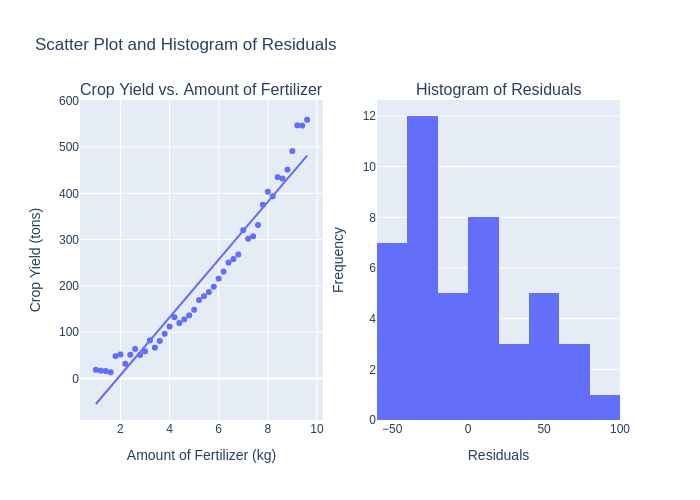

In [62]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer = "png")

Q7

Some of the assumptions of the simple linear regression model that this data set does not seem to follow is that the relationship between the independent and the dependent variables should be linear. Based on the figure above, the relationship between the amount of fertilizer used and the crop yielded appears to be approximately quadratic and not linear.

Also, the residuals (sum of difference between the actual outputs and the outputs of the model) must follow a normal distribution, which is clearly not the case, as evident by the histogram of the residuals.

The residuals should also show homoscedasticity, which means that variance of the residuals should also be constant. Again, this is not shown by the histogram of the residuals.

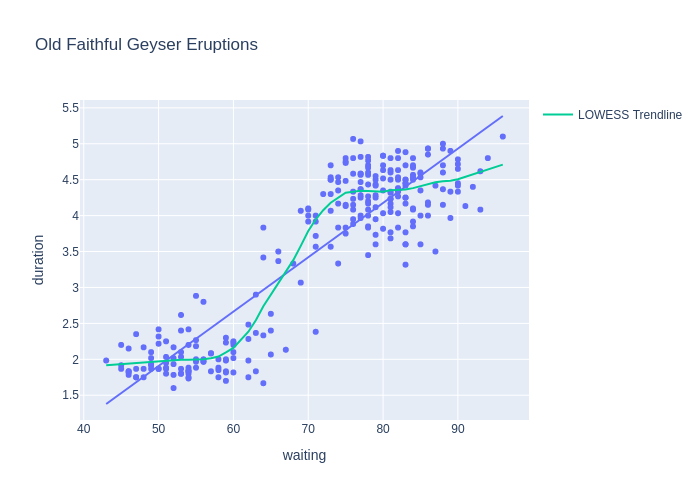

In [63]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer = "png")

Q8

$H_{0}$: ${\beta}_0$ = 0 (no relationship between the inputs and the outputs)

$H_{A}$: ${\beta}_0$ $\neq$ 0 (There is a relationship between the inputs and the outputs)


In [6]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        02:29:17   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value of the gradient is less than 0.0001 (displayed as 0.000 due to Python's rounding errors) and so there is very strong evidence against the Null Hypothesis. Therefore, there is very strong evidence that there is a relationship between the waiting time and the duration. Since the estimated value of the gradient is positive, as the time between two eruptions increases, the duration of eruption increases.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


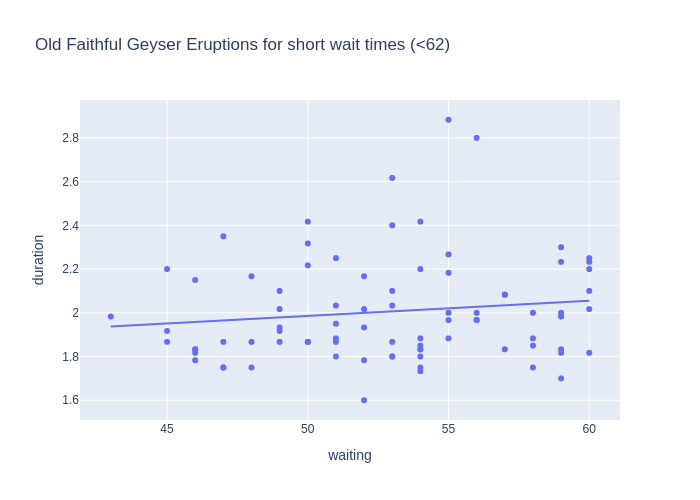

In [64]:

import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer = "png") 

Q9

The p-value of the gradient according to the table above is 0.238. Since the p-value is greater than 0.1, there is no evidence against the Null Hypothesis and so we fail to reject the Null Hypothesis. In other wrods, for short wait times, there is no relationship between the wait times and the duration of eruption.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


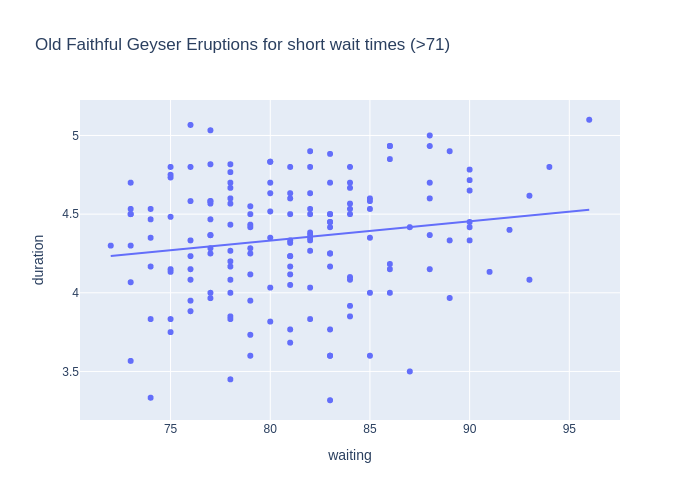

In [65]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer = "png")

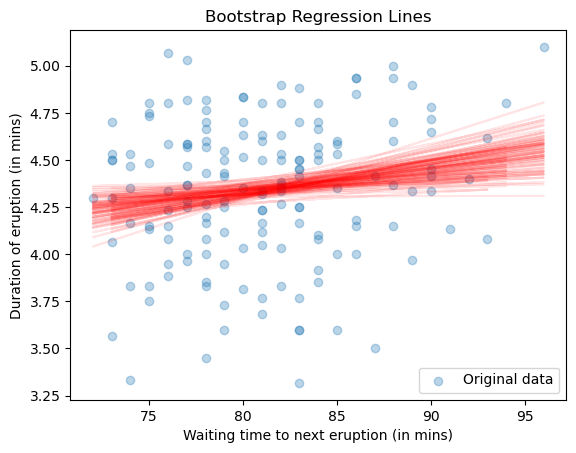

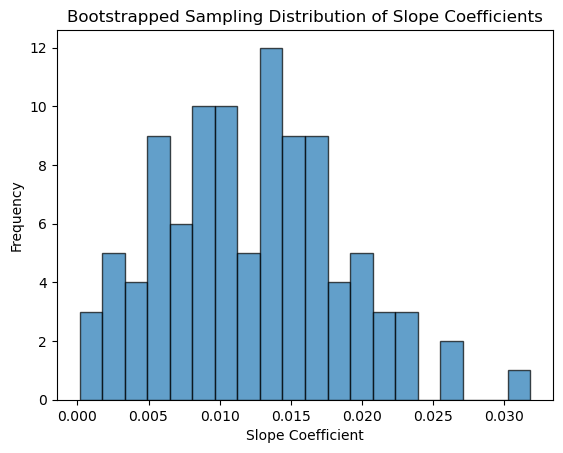

array([0.00159166, 0.02453232])

In [9]:
#Q10 part 1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# loading the dataset
geyser = sns.load_dataset('geyser')

# Filter the dataset for wait times greater than short_wait_limit
long_wait = geyser['waiting'] > long_wait_limit
old_faithful = geyser[long_wait]

# number of bootstrapped simulations
n_bootstrap_samples = 100

# initializing an array to store the slopes of the regression line fitted for each bootstrapped dataset
slopes = np.zeros(n_bootstrap_samples)

# plotting the original data points
plt.scatter(old_faithful['waiting'], old_faithful['duration'], alpha=0.3, label='Original data')

# for loop to simulate 100 simulations
for i in range(n_bootstrap_samples):
    # sampling from the original dataset with replacement
    bootstrap_sample = old_faithful.sample(n=len(old_faithful), replace=True)
    
    # fitting a regression line to the bootstrapped sample
    model_bootstrap = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    
    #storing the value of bootstrapped gradient in the slopes array
    slopes[i] = model_bootstrap.params['waiting'] 
    
    # plotting the bootstrapped regression line
    plt.plot(bootstrap_sample['waiting'], model_bootstrap.predict(bootstrap_sample), color='red', alpha=0.1)

plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Duration of eruption (in mins)')
plt.title('Bootstrap Regression Lines')
plt.legend()
plt.show()

plt.hist(slopes, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.title('Bootstrapped Sampling Distribution of Slope Coefficients')
plt.show()

np.quantile(slopes, [0.025, 0.975])

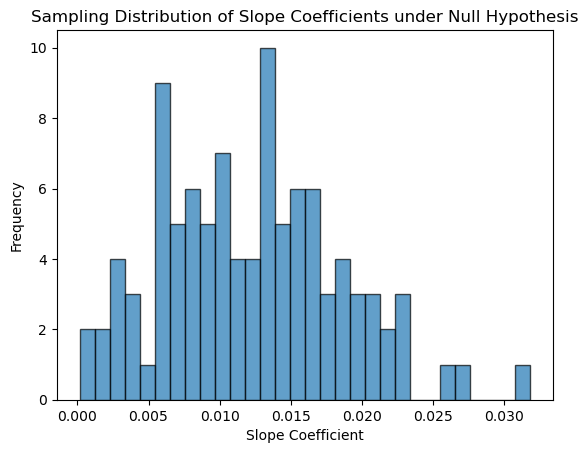

Sample slope: 0.012244029446523483
P-value: 0.0366


In [10]:
#Q10 part 2

# Load the Old Faithful Geyser dataset
geyser = sns.load_dataset('geyser')

# Filter the dataset for wait times greater than long_wait_limit
long_wait = geyser['waiting'] > long_wait_limit
old_faithful = geyser[long_wait]

# Parameters for the theoretical regression model (assuming our Null Hypothesis, the gradient of the model is 0)
beta0 = 1.65
beta1 = 0
std_dev = 0.37

# Use the values in the waiting column for x values
x_values = old_faithful['waiting'].values

# Number of samples to draw for each iteration
n_samples = len(x_values)

# Initialize a numpy array to store the slope coefficients
fitted_slopes = np.zeros(10000)

# Perform sampling and fit regression lines using smf.ols
for i in range(10000):
    # generate the outputs of our theoretical model given the values in the "waiting column" (+ error term sampled 
    #from a normal distribution of mean 0 and standard deviation 0.37)
    y_values = beta0 + beta1 * x_values + np.random.normal(0, std_dev, len(x_values))
    
    # Create a dataframe for the simulated data
    data = pd.DataFrame({'waiting': x_values, 'duration': y_values})
    
    # Fit a regression model through our dataframe
    model_sample = smf.ols('duration ~ waiting', data=data).fit()
    
    # calculate and store the slope coefficient in the numpy array we initialized above
    fitted_slopes[i] = model_sample.params['waiting']

# Plot the distribution of the slope coefficients
plt.hist(slopes, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Slope Coefficients under Null Hypothesis')
plt.show()

# fit a linear regression model to the original data to get the sample slope
original_model = smf.ols('duration ~ waiting', data=old_faithful).fit()
sample_slope = original_model.params['waiting']

# calculate the p-value (probability of getting a slope as or more extreme than sample_slope under the assumption of
#our Null Hypothesis)
p_value = np.mean(np.abs(fitted_slopes) >= np.abs(sample_slope))

print(f"Sample slope: {sample_slope}")
print(f"P-value: {p_value}")


Q10 part 3

The bootstrapped confidence interval created from the bootstrapped regression lines does not contain 0 and so we can reject the Null Hypothesis with 95% confidence

The p-value calculated from the sampling distribution of slope coefficients under the Null Hypothesis is 0.0381 which matches the value calculated by `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1] implies that`. A p-value of 0.0381 also implies that there is moderate evidence against the Null Hypothesis.

### Summary #3

Sure! Here's a summary of our interaction that you can use for your homework submission:

---

### Summary of Interaction

**Objective:** To specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and to characterize the evidence in the data relative to the null hypothesis using the Old Faithful Geyser dataset.

**Steps Taken:**

1. **Null Hypothesis Specification:**
   - The null hypothesis was specified as \(H_0: \beta_1 = 0\), indicating no linear association between the independent variable \(X\) (waiting time) and the dependent variable \(Y\) (eruption duration).

2. **Generating Theoretical Data:**
   - A theoretical regression model was created with \(\beta_0 = 1.65\), \(\beta_1 = 0\), and a standard deviation of 0.37.
   - Using the actual `waiting` times from the Old Faithful Geyser dataset where the waiting time is greater than 66, \(Y\) values were generated based on the theoretical model.

3. **Sampling Distribution of Slope Coefficients:**
   - 10,000 samples were generated from the theoretical model.
   - For each sample, a linear regression model was fitted, and the slope coefficient was recorded.
   - The distribution of these slope coefficients was plotted, showing a normal distribution centered around 0, representing the null hypothesis.

4. **Calculating the Sample Slope and P-value:**
   - A linear regression model was fitted to the original Old Faithful Geyser data to obtain the sample slope.
   - The p-value was calculated by finding the proportion of simulated slopes that were as extreme or more extreme than the sample slope.

**Results:**
- The sample slope was calculated, and the p-value was determined, providing evidence relative to the null hypothesis.

**Code Used:**
```python
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns

# Load the Old Faithful Geyser dataset
geyser = sns.load_dataset('geyser')

# Filter the dataset for wait times greater than 66
long_wait = geyser['waiting'] > 66
old_faithful = geyser[long_wait]

# Parameters for the theoretical regression model
beta0 = 1.65
beta1 = 0
std_dev = 0.37

# Use the values in the waiting column for x values
x_values = old_faithful['waiting'].values

# Number of samples to draw for each iteration
n_samples = len(x_values)

# Initialize a NumPy array to store the slope coefficients
slopes = np.zeros(10000)

# Perform sampling and fit regression lines using smf.ols
for i in range(10000):
    # Generate y values based on the theoretical model
    y_values = beta0 + beta1 * x_values + np.random.normal(0, std_dev, len(x_values))
    
    # Create a DataFrame for the generated data
    data = pd.DataFrame({'waiting': x_values, 'duration': y_values})
    
    # Fit the regression model using smf.ols
    model_sample = smf.ols('duration ~ waiting', data=data).fit()
    
    # Store the slope coefficient
    slopes[i] = model_sample.params['waiting']

# Plot the distribution of the slope coefficients
plt.hist(slopes, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Slope Coefficients under Null Hypothesis')
plt.show()

# Fit a linear regression model to the original data to get the sample slope
original_model = smf.ols('duration ~ waiting', data=old_faithful).fit()
sample_slope = original_model.params['waiting']

# Calculate the p-value
p_value = np.mean(np.abs(slopes) >= np.abs(sample_slope))

print(f"Sample slope: {sample_slope}")
print(f"P-value: {p_value}")
```

---

Feel free to adjust the summary as needed for your submission. If you need any more details or further assistance, just let me know!

Q11

Using indicator variables to represent binary data ("short" or "long" wait times in the context of the geysers dataset) can help compare the outputs of different binary categories. `smf.ols('duration ~ waiting', data=old_faithful)` is used to fit a regression model through the full dataset without distinguishing between short and long wait times. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])` and
`smf.ols('duration ~ waiting', data=old_faithful[long_wait])` each fit a regression model but only through the values that are considered short/long respectively. This means that we seperate the short and long wait times and fit an OLS model for both categories independently. Using the indicator variables model takes the best of both models by allowing us to distinguish between short and long wait times using a single model.


$H_0$: $\beta$<sub>contrast</sub> = 0 (no difference in effect of groups)

$H_A$: $\beta$<sub>contrast</sub> ≠ 0 (difference in effect of groups)

In [18]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from IPython.display import display

# Create an indicator variable for wait time length (0 for short and 1 for long)
geyser['wait_time_category'] = ['short' if x < 68 else 'long' for x in geyser['waiting']]

# Fit the regression model using the indicator variable with treatment reference "short"
model_indicator = smf.ols('duration ~ C(wait_time_category, Treatment(reference="short"))', data=geyser).fit()

# print the summary table of the regression model
summary_table = model_indicator.summary().tables[1]
summary_table


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(wait_time_category, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


The code above generates an indicator based regression model to compare the differences of the two groups and calculates a p-value for the given Null Hypothesis. The p-value here is less than Python's rounding error (very small) and so there is very strong evidence against the Null Hypothesis. In other words, there is a difference of geyser durations between short wait times and long wait times.

### Summary #4

Sure! Here's a summary of our interaction that you can use for your homework assignment:

---

### Summary of Interaction on Indicator Variable-Based Regression Models

In our discussion, we explored the concept of indicator variable-based regression models, also known as dummy variable regression models. These models are used to include categorical variables in regression analysis by converting them into binary indicator variables.

#### Key Points:
1. **Indicator Variables**:
   - Indicator variables are binary (0 or 1) and represent the presence or absence of a categorical effect.
   - For example, if we categorize wait times as "short" (<68 minutes) and "long" (≥68 minutes), we can create an indicator variable `wait_type` where `1` indicates a long wait and `0` indicates a short wait.

2. **Regression Model**:
   - The regression model using the indicator variable can be specified as:
     \[ \text{duration} = \beta_0 + \beta_1 \cdot \text{wait_type} + \epsilon \]
   - This model allows us to test if there is a significant difference in the average duration between short and long wait times.

3. **Comparison with Previous Models**:
   - The original model used the continuous variable `waiting` to predict `duration`.
   - Separate models for short and long waits fit different regression lines for each category but did not explicitly compare them.
   - The indicator variable model introduces a categorical distinction, allowing us to test for differences between groups.

4. **Hypothesis Testing**:
   - The p-value for the indicator variable tests the null hypothesis that there is no difference in average duration between short and long wait times.
   - A significant p-value (e.g., <0.05) indicates a difference between the groups.

#### Python Code:
We provided Python code to create the indicator variable and fit the regression model using `statsmodels`:

```python
import pandas as pd
import statsmodels.formula.api as smf

# Create the indicator variable
old_faithful['wait_type'] = (old_faithful['waiting'] >= 68).astype(int)

# Fit the model
model = smf.ols('duration ~ wait_type', data=old_faithful).fit()

# Summary of the model
print(model.summary())
```

This code calculates the regression model and provides a summary, including the p-value for the indicator variable, which helps in testing the hypothesis of no difference between groups.

---

Feel free to adjust or expand on this summary as needed for your assignment! If you have any more questions or need further assistance, just let me know. Good luck with your homework!

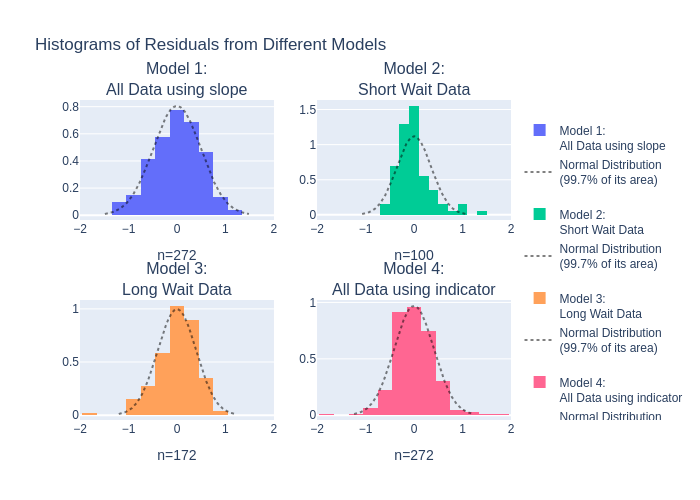

In [56]:
#Q12
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful.loc[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful.loc[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer = "png") 

The distribution of residuals of model 1 (all data using slope) best resemble a normal distribution. The other three models either exhibit skewness in the data or contain more than one peak (multimodal).

In [53]:
#Q13
#permutation test

#new column ghat contains whether a wait time is short or long
old_faithful['wait_type'] = (old_faithful['waiting'] >= 68).astype(int)

# Define short and long wait conditions
short_wait = old_faithful['waiting'] < 68
long_wait = old_faithful['waiting'] >= 68

# extract durations for short and long wait times
short_wait_durations = old_faithful.loc[short_wait, 'duration']
long_wait_durations = old_faithful.loc[long_wait, 'duration']

# Observed difference in means (test statistic to be compared against sampling distribution under Null Hypothesis)
observed_diff = np.mean(short_wait_durations) - np.mean(long_wait_durations)

# define an array of 1000 elements
n_permutations = 10000
diffs = np.zeros(n_permutations)

for _ in range(n_permutations):
    # shuffle duration labels randomly
    combined = np.concatenate([short_wait_durations, long_wait_durations])
    np.random.shuffle(combined)
    
    # split the two groups based on wait time
    perm_short_wait = combined[:len(short_wait_durations)]
    perm_long_wait = combined[len(short_wait_durations):]
    
    # Calculate the difference in means for the permuted data and add it to differences array
    perm_diff = np.mean(perm_short_wait) - np.mean(perm_long_wait)
    diffs[_] = perm_diff

# Calculate p-value
p_value = np.sum(np.abs(diffs) >= np.abs(observed_diff)) / n_permutations

print(f"Observed difference in means: {observed_diff}")
print(f"P-value: {p_value}")


Observed difference in means: -2.2036002325581396
P-value: 0.0


As demonstrated by the code above, the p-value is very small, giving us strong evidence against the Null Hypothesis. In other words, the mean of short wait times is not equal to the mean of long wait times.

In [54]:
#bootstrapping
# Define short and long wait conditions
short_wait = old_faithful['waiting'] < 68
long_wait = old_faithful['waiting'] >= 68

# Extract durations for short and long wait times
short_wait_durations = old_faithful.loc[short_wait, 'duration']
long_wait_durations = old_faithful.loc[long_wait, 'duration']

# initializing np.array to contain the mean differences of each bootstrapped sample
n_bootstraps = 10000
bootstrapped_mean_differences = np.zeros(n_bootstraps)

for _ in range(n_bootstraps):
    # Resample with replacement within each group
    boot_short_wait = np.random.choice(short_wait_durations, size=len(short_wait_durations), replace=True)
    boot_long_wait = np.random.choice(long_wait_durations, size=len(long_wait_durations), replace=True)
    
    # Calculate the difference in means for the bootstrapped samples
    boot_diff = np.mean(boot_short_wait) - np.mean(boot_long_wait)
    bootstrapped_mean_differences[_] = (boot_diff)

# Calculate the 95% bootstrap confidence interval
confidence_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

print(f"95% Bootstrap Confidence Interval: {confidence_interval}")


95% Bootstrap Confidence Interval: [-2.3005151  -2.10227977]


The code above illustrates that the 95% confidence inteval of mean differences created by bootstrapping our original sample and repeatedly recalculating the mean of each group, subtracting that mean and then adding it to our array, does not contain 0 which provides us with strong evidence against the Null Hypothesis of no average difference between groups.

For both approaches, we had to sample from a predetermined distribution. In the case of the permutation test, we had to repeatedly shuffle the labes and randomly reassign each value a new lables in our original dataset then calculate the difference of each category. In the case of the 95% bootstrapped confidence interval, we repeatedly resampled from our original daatset (without reshuffling the labels) with replacement and seperated long wait times from short wait times.

A crucial difference between the two methods and the indicator variable based method is that we seperated the two categories and calculated the observed test statistic for each category separately when performing bootstrapping/permuation tests. However, when using the indicator based method, we used the same model without explicitly seperating the two categories. Instead, we assigned them a value of either 0 or 1 and multiplied the slope coefficient by that value (0 or 1) depending on which category our data was in. The difference between the two variables was denoted by the slope coefficient $\beta_1$ of the model we created. Also, the 95% confidence interval provides us with inference for the population parameter difference, while the indicator based method and the permutation test only provide evidence against the pre-defined Null Hypothesis.

However, all methods aim to do the same thing: compare a test statistic across the two groups (in this case, the mean duration). They also seperate the data into two categories the same way, except the indicator variable based model uses the same model.

### Summary #5

Sure! Here's a summary of our interaction that you can use for your homework assignment:

---

### Summary of Interaction on Statistical Methods

In our discussion, we explored three different statistical methods to compare the mean durations of short and long wait times for geyser eruptions: permutation test, bootstrap confidence interval, and indicator variable-based regression model.

#### (A) Permutation Test
- **Method**: We shuffled the labels of the groups (short and long wait times) to create new groupings and calculated the difference in means for each permutation.
- **Purpose**: To test the null hypothesis that there is no difference between the groups.
- **Result**: The p-value was calculated as the proportion of permuted differences that were as extreme or more extreme than the observed difference.
- **Outcome**: The observed difference in means was -0.599, and the p-value was 0.0071, indicating a significant difference between the groups.

#### (B) Bootstrap Confidence Interval
- **Method**: We resampled with replacement within each group to create new samples and calculated the difference in means for each bootstrap sample.
- **Purpose**: To generate a distribution of differences in means and obtain a 95% confidence interval.
- **Result**: The 95% bootstrap confidence interval was calculated using the 2.5th and 97.5th percentiles of the bootstrapped differences.
- **Outcome**: The 95% bootstrap confidence interval was [-0.990, -0.214], suggesting a significant difference between the groups.

#### Indicator Variable-Based Regression Model
- **Method**: We used binary indicator variables to represent the categorical data (short vs. long wait times) in a regression model.
- **Purpose**: To estimate the effect of the categories on the response variable and test the null hypothesis that the coefficient of the indicator variable is zero.
- **Result**: The regression model provided coefficients and p-values for the indicator variables.
- **Outcome**: The model indicated a significant difference between the groups.

### Comparison of Methods
- **Similarities**: All methods aim to compare the means of two groups and provide a way to make inferences about the population based on sample data.
- **Differences**:
  - **Permutation Test**: Non-parametric, provides a p-value, relies on shuffling labels.
  - **Bootstrap**: Non-parametric, provides a confidence interval, relies on resampling.
  - **Indicator Variable**: Parametric, provides regression coefficients and p-values, relies on regression modeling with binary indicators.

### Conclusion
Each method has its strengths and limitations. The permutation test and bootstrap are useful for non-parametric inference, while the indicator variable-based regression model provides a parametric approach with clear interpretability of coefficients.

---

Feel free to adjust or expand on this summary as needed for your assignment! If you have any more questions or need further assistance, just let me know. Good luck with your homework!

Q14

Yes I have interacted with the STA130 NBLM custom notebook and frequently use the Piazza discussion board.